**1. Importing necessary libraries and combining no. of CSV**

In [211]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

#combining no of csv file into one file with name combine_csv
#os.chdir('D:\Final')
os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\with_Offset')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
#dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'],square_RTT1=df['AP1RTT']*df['AP1RTT'],square_RTT2=df['AP2RTT']*df['AP2RTT'],square_RTT3=df['AP3RTT']*df['AP3RTT'])
dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'])
# Group the DataFrame by 'x' and 'y'
groups = dff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])

In [212]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)
df1

,AP1RTTA,AP1STDEVA,AP2RTTA,AP2STDEVA,AP3RTTA,AP3STDEVA,x,y,Product_RTTA,Product_RTT12A,Product_RTT23,Product_RTT13A
0,11.770082,0.145,6.115656,0.150,7.698439,0.372,1,1,554.147283,71.981772,47.081003,90.611260
1,11.283082,0.407,6.145656,0.267,7.659439,0.425,1,1,531.120362,69.341940,47.072276,86.422080
2,11.067082,0.245,6.428656,0.630,7.894439,0.414,1,1,561.661412,71.146463,50.750631,87.368406
3,10.130082,0.864,5.803656,0.210,8.401439,1.739,1,1,493.933294,58.791511,48.759060,85.107268
4,11.946082,0.252,6.194656,0.105,7.620439,0.513,1,1,563.926722,74.001868,47.205997,91.034391
...,...,...,...,...,...,...,...,...,...,...,...,...
327,1.194914,0.271,8.179640,0.152,5.990282,1.101,6,8,58.548811,9.773966,48.998353,7.157871
328,1.350914,0.146,8.179640,0.154,5.932282,1.149,6,8,65.551655,11.049989,48.523934,8.014002
329,1.359914,0.412,8.238640,0.110,6.049282,1.107,6,8,67.775196,11.203841,49.837859,8.226503
330,1.350914,0.211,8.121640,0.148,6.049282,1.129,6,8,66.370524,10.971636,49.130093,8.172059


In [213]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [214]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()

In [215]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions

grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()

In [216]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions

groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [217]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [218]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [219]:
#taking input data and output data by concatinating two dataframes
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]
input_data


,AP1RTTA_min,AP1RTTA_max,AP1RTTA_25,AP1RTTA_50,AP1RTTA_75,AP1STDEVA_min,AP1STDEVA_max,AP1STDEVA_25,AP1STDEVA_50,AP1STDEVA_75,...,A_P_1_R_T_T_B,A_P_1_S_T_D_E_V_B,A_P_2_R_T_T_B,A_P_2_S_T_D_E_V_B,A_P_3_R_T_T_B,A_P_3_S_T_D_E_V_B,P_r_o_d_u_c_t___R_T_T_B,P_r_o_d_u_c_t___R_T_T_1_2_B,P_r_o_d_u_c_t___R_T_T_2_3,P_r_o_d_u_c_t___R_T_T_1_3_B
0,9.192082,12.180082,9.807082,10.071082,10.364082,0.124,2.368,0.90200,1.0420,1.15100,...,9.860985,1.116149,6.076388,0.144283,8.066601,0.136864,483.355744,59.918953,49.015791,79.546866
1,7.977884,9.831884,9.167884,9.196884,9.255884,0.122,2.568,0.26200,0.2970,0.34000,...,9.230879,0.424747,6.282222,0.510474,7.077682,0.443328,410.422222,57.989021,44.462794,65.333477
2,8.095074,8.877074,8.451074,8.544074,8.642074,0.000,2.189,0.12850,0.2080,0.43600,...,8.431657,0.286670,6.606535,0.814729,6.086084,0.390941,339.107072,55.709792,40.214378,51.315477
3,6.067432,7.991432,6.224432,6.302432,6.380432,0.306,1.100,0.83100,0.8920,0.95200,...,6.310012,0.893827,9.223969,0.799677,2.234744,0.142254,130.063303,58.203495,20.613175,14.100569
4,4.905337,7.274337,6.063337,6.180337,6.258337,0.085,2.070,0.27450,0.3640,0.45700,...,6.049487,0.495289,9.939359,0.351382,1.413777,0.984149,85.000437,60.123097,14.053020,8.551983
5,7.337477,10.073477,9.330477,9.418477,9.535477,0.000,2.263,0.45600,0.5575,0.98950,...,9.466362,0.705821,5.016889,1.094408,8.184383,0.573785,388.937806,47.508577,41.073349,77.473724
6,6.385924,9.496924,8.558924,8.715924,8.773924,0.234,2.606,0.75300,0.7930,0.84000,...,8.600833,0.816597,5.375125,0.214925,7.659420,0.891429,353.903410,46.230158,41.169387,65.843040
7,5.704424,8.903424,7.656424,7.773424,7.861424,0.138,2.154,0.58200,0.6310,0.71100,...,7.881820,0.618753,5.846336,1.605957,6.046766,1.708095,278.653268,46.081722,35.352036,47.660037
8,3.962147,6.609147,5.114147,5.622147,6.130147,0.067,3.159,0.26400,0.4690,0.72100,...,5.195255,0.737088,8.582743,0.745549,2.833381,0.200416,126.394474,44.610483,24.318763,14.719288
9,2.266863,5.977863,4.961863,5.185863,5.352863,0.069,2.312,0.28900,0.3960,0.49500,...,5.046985,0.474463,9.446476,0.147662,2.166277,1.417366,103.272514,47.676535,20.462292,10.933095


In [220]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [221]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 120)


In [222]:
#Used standardscaler 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**2. Test with Random Forest Regressor**

In [223]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 1.066
Root Mean Squared Error (RMSE) on new data in meter: 1.033
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 24.929
R2 score is in percent: 72.55


**3. Testing with KNN Regressor**

In [224]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.05
Root Mean Squared Error (RMSE) on new data in m: 1.02
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 24.585
R2 score is in percent: 72.47


**4. Testing with DNN Regressor Model and Hyperparameter Tuning by using Keras Tuner**

In [225]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(120,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu','sigmoid','tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [226]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='tuner_test',
    project_name='RTT_fingerprinting')

INFO:tensorflow:Reloading Tuner from tuner_test\RTT_fingerprinting\tuner0.json


In [227]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [228]:
tuner.results_summary()

Results summary
Results in tuner_test\RTT_fingerprinting
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 400
dropout_1: 0.30000000000000004
num_hidden_layers: 1
units_2: 272
activation_2: sigmoid
dropout_2: 0.0
learning_rate: 0.01
units_3: 368
activation_3: relu
dropout_3: 0.0
units_4: 496
activation_4: relu
dropout_4: 0.1
units_5: 64
activation_5: sigmoid
dropout_5: 0.4
units_6: 320
activation_6: relu
dropout_6: 0.1
units_7: 80
activation_7: sigmoid
dropout_7: 0.0
units_8: 128
activation_8: tanh
dropout_8: 0.1
units_9: 384
activation_9: sigmoid
dropout_9: 0.0
units_10: 496
activation_10: tanh
dropout_10: 0.2
units_11: 48
activation_11: sigmoid
dropout_11: 0.0
Score: 0.7750286857287089
Trial summary
Hyperparameters:
units_1: 288
dropout_1: 0.1
num_hidden_layers: 2
units_2: 208
activation_2: sigmoid
dropout_2: 0.1
learning_rate: 0.01
units_3: 384
activation_3: sigmoid
dropout_3: 0.2
units_4: 432
activation_4: tanh
dropout_4: 0.4
units_5: 224
activation_5: tanh
dropout_5: 

In [229]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 1s 593ms/step - loss: 20.9739 - mse: 20.9739 - val_loss: 2.2402 - val_mse: 2.2402
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 3.0718 - mse: 3.0718 - val_loss: 4.3217 - val_mse: 4.3217
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 5.3419 - mse: 5.3419 - val_loss: 3.6377 - val_mse: 3.6377
Epoch 4/500
1/1 [==============================] - 0s 21ms/step - loss: 3.7730 - mse: 3.7730 - val_loss: 2.2579 - val_mse: 2.2579
Epoch 5/500
1/1 [==============================] - 0s 23ms/step - loss: 1.6791 - mse: 1.6791 - val_loss: 1.8397 - val_mse: 1.8397
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 0.8790 - mse: 0.8790 - val_loss: 2.0005 - val_mse: 2.0005
Epoch 7/500
1/1 [==============================] - 0s 20ms/step - loss: 1.0265 - mse: 1.0265 - val_loss: 1.8869 - val_mse: 1.8869
Epoch 8/500
1/1 [==============================] - 0s 20ms/step - loss: 0.9087 - mse: 0

In [230]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.9529 - mse: 0.9529


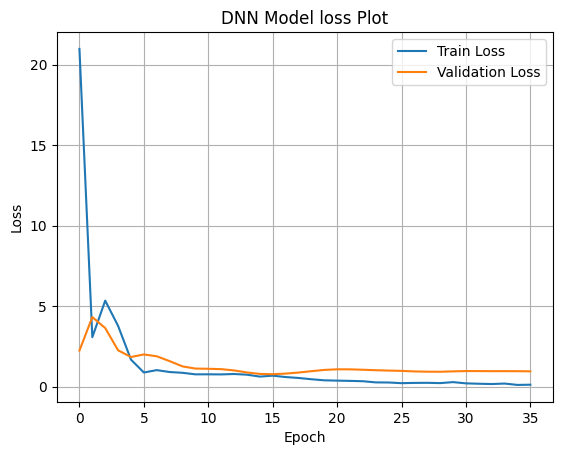

In [231]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [232]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 34ms/step


array([[5.0392313, 1.6168666],
       [5.879202 , 6.484432 ],
       [1.454984 , 7.2280188],
       [2.9867556, 1.8118784],
       [5.52092  , 6.961065 ],
       [4.9390097, 1.8202083],
       [1.5794966, 1.0215493],
       [5.573147 , 6.6510825],
       [5.4914074, 1.0750955],
       [2.7919214, 7.42346  ],
       [3.0131562, 7.403588 ],
       [1.5750241, 7.4433336]], dtype=float32)

In [233]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.95
Root Mean Squared Error (RMSE) on new data in m: 0.98
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 20.76
R2 score is in percent: 78.02


**5. Random Regressor for DNN output**

In [235]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 50}
Mean Squared Error in meter: 0.165
Root Mean Squared Error (RMSE) on new data in meter: 0.407
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.067
R2 score is in percent: 95.11


**6. KNN Regressor for DNN Output**

In [236]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.68
Root Mean Squared Error (RMSE) on new data in m: 0.82
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 20.91
R2 score is in percent: 82.41


In [237]:
#for saving DNN Model
from tensorflow.keras.models import load_model

dnn_model.save('final_dnn_model.h5')


In [238]:
loaded_model = load_model('final_dnn_model.h5')
loaded_model

**7. Validate the model with Unknown/online dataset**

In [243]:

# dfff=pd.read_csv('D:/testt.csv')
data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\With_offset'
os.chdir(data_folder)
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
dfff

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y,x1,y1,x2,y2,x3,y3,True_range1,True_range2,True_range3
0,9.668149,1.209,-67.0,6.055633,0.163,-55,8.026878,0.140,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
1,9.727149,1.174,-66.0,6.055633,0.162,-55,8.055878,0.150,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
2,9.580149,1.205,-66.0,6.055633,0.140,-55,8.114878,0.125,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
3,9.697149,1.191,-67.0,6.016633,0.126,-55,7.977878,0.165,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
4,9.815149,1.128,-66.0,6.055633,0.186,-55,8.084878,0.145,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.482527,0.661,-53.0,8.242545,0.126,-68,6.282632,0.907,-60,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763
219,1.511527,0.165,-54.0,8.242545,0.141,-68,6.517632,0.874,-59,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763
220,1.580527,0.136,-54.0,8.281545,0.126,-68,6.722632,0.577,-56,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763
221,1.306527,1.239,-52.0,8.359545,0.065,-68,6.077632,1.011,-58,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763


In [244]:
dfff.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
# dfff.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)
#dffff=dfff.assign(Product_RTT=dfff['AP1RTT']*dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT12=dfff['AP1RTT']*dfff['AP2RTT'],Product_RTT23=dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT13=dfff['AP1RTT']*dfff['AP3RTT'],square_RTT1=dfff['AP1RTT']*dfff['AP1RTT'],square_RTT2=dfff['AP2RTT']*dfff['AP2RTT'],square_RTT3=dfff['AP3RTT']*dfff['AP3RTT'])
dffff=dfff.assign(Product_RTT=dfff['AP1RTT']*dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT12=dfff['AP1RTT']*dfff['AP2RTT'],Product_RTT23=dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT13=dfff['AP1RTT']*dfff['AP3RTT'])

In [245]:
# Group the DataFrame by 'x' and 'y'
groups = dffff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])

In [246]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)

In [247]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [248]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()


In [257]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()

In [258]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# # Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [259]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [260]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [261]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [262]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(37, 2)
(37, 120)


In [263]:
sc = StandardScaler()
XX= sc.fit_transform(XX)


In [264]:
y_predd=loaded_model.predict(XX)
y_predd

2/2 [==============================] - 0s 2ms/step


array([[1.0241015, 1.0564634],
       [1.0245867, 1.2512162],
       [1.097249 , 2.0594437],
       [1.5034928, 7.3881807],
       [1.4969572, 7.280389 ],
       [1.9424794, 1.1443121],
       [1.5146435, 1.416301 ],
       [2.2605517, 1.7920661],
       [1.7124338, 7.5500345],
       [1.856937 , 7.405486 ],
       [3.1213107, 1.0554874],
       [2.2879899, 1.5543051],
       [2.893906 , 2.0492826],
       [3.7368915, 4.6603546],
       [3.0034697, 5.82613  ],
       [3.186367 , 7.243889 ],
       [3.3301485, 7.3202868],
       [3.2742054, 7.3181953],
       [4.496418 , 1.0861751],
       [3.6749084, 1.5898135],
       [4.1740036, 3.0400841],
       [4.518325 , 3.9265141],
       [4.025958 , 7.6861978],
       [5.097088 , 1.0804415],
       [5.699544 , 1.2842048],
       [5.820712 , 3.6069837],
       [5.492134 , 6.7276874],
       [5.4178343, 6.808042 ],
       [5.303301 , 6.8401575],
       [5.33222  , 6.9843197],
       [5.981982 , 1.226215 ],
       [6.121722 , 1.7729598],
       [

In [267]:
mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.30
Root Mean Squared Error (RMSE) on new data in mm: 0.55
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 12.90
R2 score is in percent: 93.70


In [268]:
#creating dataframe for predicting values comparing with True values
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(y_predd, columns=['predicted_x','predicted_y'])
df_finall_dnn = pd.DataFrame()
df_finall_dnn = pd.concat([y_predd, yy], axis=1)
df_finall_dnn

,predicted_x,predicted_y,x,y
0,1.024101,1.056463,1,1
1,1.024587,1.251216,1,2
2,1.097249,2.059444,1,3
3,1.503493,7.388181,1,7
4,1.496957,7.280389,1,8
5,1.942479,1.144312,2,1
6,1.514644,1.416301,2,2
7,2.260552,1.792066,2,3
8,1.712434,7.550035,2,7
9,1.856937,7.405486,2,8


In [269]:
#df_finall_dnn.to_csv('output_data_dnn.csv', index=False) #for saving output value in csv file for reference

**8. Random Forest Regressor for final Prediction**

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import r2_score

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_predd,yy)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Best Hyperparameters: {'max_depth': 8, 'n_estimators': 200}
Mean Squared Error in meter: 0.067
Root Mean Squared Error (RMSE) on new data in meter: 0.258
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 8.59
R2 score is in percent: 98.38


In [271]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.245,1.230,1,1
1,1.240,1.750,1,2
2,1.355,2.845,1,3
3,1.285,7.300,1,7
4,1.480,7.465,1,8
5,2.035,1.325,2,1
6,1.885,1.985,2,2
7,2.195,2.800,2,3
8,1.940,7.235,2,7
9,1.890,7.680,2,8


In [272]:
#df_finall.to_csv('output_data_with_ex.csv', index=False)

**9. KNN Regressor for Final Prediction**

In [274]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_predd, yy)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.16
Root Mean Squared Error (RMSE) on new data in m: 0.40
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 13.75
R2 score is in percent: 95.80


In [275]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(knn_pred, columns=['predicted_x','predicted_y'])
df_finall_knn = pd.DataFrame()
df_finall_knn = pd.concat([y_predd, yy], axis=1)
df_finall_knn

,predicted_x,predicted_y,x,y
0,1.333333,1.333333,1,1
1,1.333333,1.666667,1,2
2,1.666667,2.666667,1,3
3,1.333333,7.333333,1,7
4,1.333333,7.666667,1,8
5,1.666667,1.333333,2,1
6,1.666667,1.666667,2,2
7,2.666667,2.666667,2,3
8,1.666667,7.666667,2,7
9,1.666667,7.666667,2,8


In [276]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state = 42)

**10. Random Forest Regressor only for validate dataset**

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(XX_train, yy_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(XX_test)

# Calculate the mean squared error
mse = mean_squared_error(yy_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 8, 'n_estimators': 100}
Mean Squared Error in meter: 0.359
Root Mean Squared Error (RMSE) on new data in meter: 0.599
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 14.66
R2 score is in percent: 86.29


**11. KNN Regressor only for validate dataset**

In [156]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(XX_train,yy_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(XX_test)

# Calculate the evaluation metrics
mse = mean_squared_error(yy_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, knn_pred)*100))

Best K value found by grid search: 5
Mean Squared Error (MSE) on new data in m: 0.68
Root Mean Squared Error (RMSE) on new data in m: 1.66
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 22.53
R2 score is in percent: 75.71
